# 6장. 로지스틱 회귀 모델: 참 거짓 판단하기

## 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

### 3. 모델 실행

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy')
model.fit(x, y, epochs=5000, verbose=0)  #verbose=1 진행 화면 출력, verbose=0 진행 화면 출력 안함.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. 모델 테스트

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


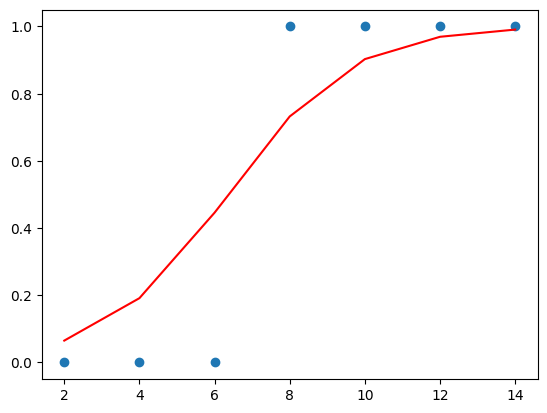

In [ ]:
# 그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()
# 네, model.predict 함수는 주어진 데이터를 바탕으로 모델이 학습한 함수를 사용하여 예측값을 반환합니다.
# 요약하자면, **model.predict**는 모델이 학습한 함수 또는 패턴을 사용하여 주어진 데이터에 대해 가장 잘 맞는 예측값을 반환합니다. 그러나 이 예측값이 완벽할 것이라는 보장은 없으며, 모델의 일반화 성능이 중요합니다.
# 이때 w1 , b 는 최적의 상태로 정해진 상태다!!

In [ ]:
import tensorflow as tf

# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
#prediction = model.predict([hour]) #텐서플로 2.9.0 까지만 가능

input_data = tf.constant([[hour]])
prediction = model.predict(input_data)[0][0]


print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다
